#### [Deliverable]: Look at the data
Start by looking at the data.

1. Load the data with pandas. Add a 'Fraud' column that contains True or False values depending on if the event is fraud. If `acct_type` field contains the word `fraud`, label that point Fraud.

2. Check how many fraud and not fraud events you have.

3. Look at the features. Make note of ones you think will be particularly useful to you.

4. Do any data visualization that helps you understand the data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [83]:
import seaborn as sns

In [158]:
def bar_percent(ax, df_col):
    # df_col = df['col_name']
    total = len(df_col)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 100,
                '{:1.3f}'.format(height/total),
                ha="center") 

In [145]:
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_json('data/data.json')

In [146]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail,previous_payouts_length,previous_payouts_length_
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,1,0,0
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False,0,49,1
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,0,36,1
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,False,0,21,1
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False,0,49,1


In [7]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [6]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [144]:
#df['description'][0]

In [9]:
df['user_age'].unique()

array([  36,  149,  214, ..., 3561, 3689, 1775])

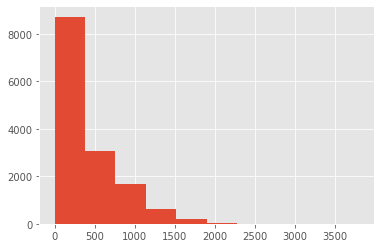

In [13]:
plt.hist(df['user_age']);

In [14]:
frauds = set(['fraudster_event', 'fraudster', 'fraudster_att'])

In [89]:
df['fraud'] = df['acct_type'].apply(lambda x: True if x in frauds else False)

In [18]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


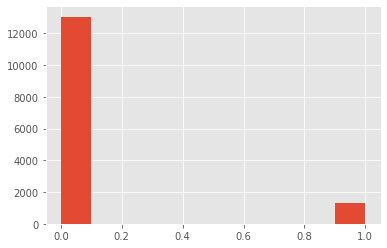

In [19]:
plt.hist(df['fraud']);

In [20]:
df['fraud'].value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [21]:
1293/13044

0.09912603495860166

In [52]:
df['fb_published']

0        0
1        0
2        0
3        0
4        1
        ..
14332    0
14333    0
14334    1
14335    0
14336    0
Name: fb_published, Length: 14337, dtype: int64

In [54]:
df['ticket_types'][0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [32]:
def convert_data(df):
    df = df[['sale_duration', 'previous_payouts', 'acct_type', 'channels', 'delivery_method', 'ticket_types', 'user_type', 'fb_published', 'num_order']].copy()

    #need to parse previous_payouts
    df['num_previous_payouts']= [len(row) for row in df['previous_payouts']]

    #Add total_cost
    total = []
    for row in df['ticket_types']:
        cost= 0
        for num in range(len(row)):
            cost +=row[num]['cost']
        total.append(cost)
    df['total_cost'] = total

    #Remove ticket_types and previous_payours columns
    df.drop(['ticket_types', 'previous_payouts'], axis =1, inplace = True)

    #Add Labels column and remove old labels columns
    df['fraud'] = pd.Series(['fraudster' in word for word in df['acct_type']])
    df.drop(['acct_type'], axis = 1, inplace = True)

    #convert listed to boolean
    # df['listed'] = [val == 'y' for val in df['listed']]

    # dummies = pd.get_dummies(df['delivery_method'], drop_first = True)
    df.fillna(inplace = True, value = 44.66)

    print("columns:", df.columns)
    return df

In [33]:
df1 = pd.read_json('data/data.json')

In [34]:
df1 = convert_data(df1)

columns: Index(['sale_duration', 'channels', 'delivery_method', 'user_type',
       'fb_published', 'num_order', 'num_previous_payouts', 'total_cost',
       'fraud'],
      dtype='object')


In [35]:
df1

,sale_duration,channels,delivery_method,user_type,fb_published,num_order,num_previous_payouts,total_cost,fraud
0,29.0,5,0.0,1,0,0,0,625.00,True
1,28.0,0,1.0,3,0,23,49,70.00,False
2,54.0,8,1.0,3,0,19,36,93.51,False
3,0.0,6,1.0,3,0,39,21,82.00,False
4,63.0,11,0.0,3,1,30,49,814.00,False
...,...,...,...,...,...,...,...,...,...
14332,11.0,0,0.0,1,0,0,0,45.00,True
14333,55.0,5,1.0,4,0,33,5,346.00,False
14334,81.0,13,0.0,4,1,1,1,210.00,False
14335,6.0,8,0.0,3,0,2,128,158.66,False


In [36]:
df['sale_duration']

0        29.0
1        28.0
2        54.0
3         0.0
4        63.0
         ... 
14332    11.0
14333    55.0
14334    81.0
14335     6.0
14336     0.0
Name: sale_duration, Length: 14337, dtype: float64

In [37]:
df['previous_payouts']

0                                                       []
1        [{'name': 'RUF', 'created': '2010-10-01 01:10:...
2        [{'name': 'Danielle Severn', 'created': '2010-...
3        [{'name': '', 'created': '2010-11-09 01:10:15'...
4        [{'name': 'Arts and Business Council or Greate...
                               ...                        
14332                                                   []
14333    [{'name': 'ARCS Foundation Inc., San Diego Cha...
14334    [{'name': '', 'created': '2013-05-16 03:26:11'...
14335    [{'name': '', 'created': '2010-11-30 01:11:30'...
14336                                                   []
Name: previous_payouts, Length: 14337, dtype: object

## EMAIL DOMAIN ##

In [41]:
df['email_domain'].unique()

array(['gmail.com', 'ruf.org', 'pvsd.k12.ca.us', ..., 'abdcycling.com',
       'newcastle-cu.com', 'sbm.ie'], dtype=object)

In [51]:
len(df['email_domain'].unique())

5772

In [44]:
df['gmail'] = df['email_domain'].apply(lambda x: 1 if x=='gmail.com' else 0)

(array([11240.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3097.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

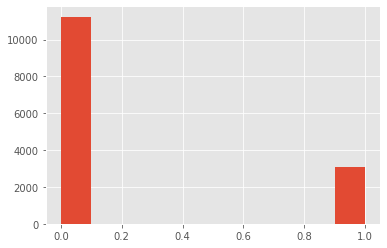

In [46]:
fig, ax = plt.subplots()

ax.hist(df['gmail'])

In [49]:
df[(df['gmail']==1) & (df['fraud']==1)]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,1
130,fraudster,1331535300,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1331041029,...,1304639602,3,,None,NaN,NaN,None,None,1,1
140,fraudster,1333519200,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1332979005,...,1304639602,3,,None,NaN,NaN,None,None,1,1
202,fraudster_event,1344189600,2170,5,US,USD,0.0,"<p> </p>\r\n<table style=""width: 801px;"" borde...",gmail.com,1343446512,...,1343430886,1,125 E. 11th Street,US,40.731565,-73.989183,Webster Hall,NY,1,1
219,fraudster_event,1348916400,0,11,US,USD,0.0,,gmail.com,1346730451,...,1346118291,1,526 E Hospital St,US,31.603631,-94.650802,Live Oak MIssionary Baptist Church,TX,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14149,fraudster_event,1336395600,309,6,US,USD,0.0,"<p><span style=""font-size: medium;"">""FUTURE"" M...",gmail.com,1335108856,...,1259613950,1,337 NE 170 ST,US,25.931295,-80.193837,G 5IVE,FL,1,1
14271,fraudster_event,1354273200,732,0,US,USD,0.0,"<p>ITS OFFICIAL, THE STREETS HAVE COSIGNED ONE...",gmail.com,1352745236,...,1349852722,1,2020 W Pensacola St,US,30.440658,-84.318076,LIT NIGHTCLUB,FL,1,1
14318,fraudster_event,1359784800,448,0,US,USD,0.0,<p>Help us produce this incredible experience....,gmail.com,1358975278,...,1358975276,1,94 West Houston Street,US,40.727236,-74.000090,Madame X,NY,1,1
14325,fraudster_event,1360049400,996,0,US,USD,0.0,"<p><span style=""font-size: medium;""><strong>Yo...",gmail.com,1359415821,...,1359415820,1,3280 Peachtree Rd NE,US,33.844403,-84.370374,AQUANOX,GA,1,1


In [50]:
df[(df['gmail']==0) & (df['fraud']==1)]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,1,0
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,1,0
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,,1,0
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD,1,0
128,fraudster,1331953200,1045,0,GB,GBP,0.0,"<p><span style=""font-size: medium; color: #ff0...",ymail.com,1330545234,...,1330544678,1,67 Old Gate Road,GB,52.740168,-1.043989,Hill Top Caravan Park,,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14255,fraudster_event,1351137600,854,0,CA,USD,0.0,<p><em><strong>FIND YOUR VOICE AND SPEAK TO LE...,yahoo.com,1350069517,...,1350069516,1,200 Advance Blvd,CA,43.691355,-79.695542,BOMBAY PALACE AND BANQUET HALL,ON,1,0
14297,fraudster_event,1362859200,6297,5,GB,GBP,0.0,"<div style=""text-align: center;""><strong></str...",thinktankconsultancy.com,1357325405,...,1355840230,1,658 Chiswick High Road,,51.490692,-0.284747,Brentford Fountain Leisure Centre,,1,0
14304,fraudster_event,1361239200,44,0,,USD,0.0,<p>musical jamboree for all music lovers</p>,usa.com,1357943181,...,1357941170,3,700 Lafayette St,US,41.172426,-73.190746,Beacon Hall Events Center,CT,1,0
14316,fraudster_event,1360310400,3276,4,GB,GBP,0.0,"<div id=""yui_3_7_2_16_1358948795407_159"" style...",hotmail.co.uk,1358948648,...,1358948648,1,Sagar Street,,53.523896,-2.276553,Al Maidah Banquet Hall and Restaurant,,1,0


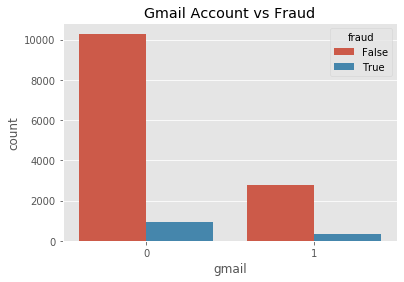

In [132]:
ax = sns.countplot(x='gmail', hue='fraud', data=df).set_title('Gmail Account vs Fraud')
fig = ax.get_figure()
fig.savefig('images/gmail_account_eda.png')

## DELIVERY DOMAIN ##

In [80]:
df[(df['delivery_method']==0) &(df['fraud']==1)]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,1
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,1,0
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,1,0
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,,1,0
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14316,fraudster_event,1360310400,3276,4,GB,GBP,0.0,"<div id=""yui_3_7_2_16_1358948795407_159"" style...",hotmail.co.uk,1358948648,...,1358948648,1,Sagar Street,,53.523896,-2.276553,Al Maidah Banquet Hall and Restaurant,,1,0
14318,fraudster_event,1359784800,448,0,US,USD,0.0,<p>Help us produce this incredible experience....,gmail.com,1358975278,...,1358975276,1,94 West Houston Street,US,40.727236,-74.000090,Madame X,NY,1,1
14325,fraudster_event,1360049400,996,0,US,USD,0.0,"<p><span style=""font-size: medium;""><strong>Yo...",gmail.com,1359415821,...,1359415820,1,3280 Peachtree Rd NE,US,33.844403,-84.370374,AQUANOX,GA,1,1
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,1,0


In [103]:
df['delivery_method'].fillna(4, inplace=True)

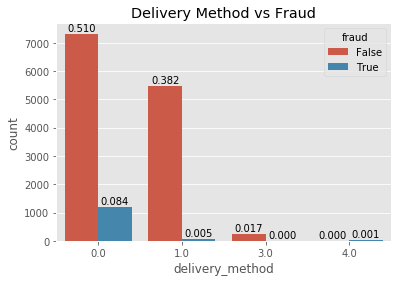

In [162]:
ax = sns.countplot(x='delivery_method', hue='fraud', data=df)
ax.set_title('Delivery Method vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['delivery_method'])
fig.savefig('images/delivery_method_eda.png')




In [82]:
df[['previous_payouts', 'fraud']]

,previous_payouts,fraud
0,[],1
1,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",0
2,"[{'name': 'Danielle Severn', 'created': '2010-...",0
3,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0
4,[{'name': 'Arts and Business Council or Greate...,0
...,...,...
14332,[],1
14333,"[{'name': 'ARCS Foundation Inc., San Diego Cha...",0
14334,"[{'name': '', 'created': '2013-05-16 03:26:11'...",0
14335,"[{'name': '', 'created': '2010-11-30 01:11:30'...",0


In [125]:
#df['previous_payouts'].apply(lambda x: len(x))

In [128]:
df['previous_payouts_length'] = df['previous_payouts'].apply(lambda x: len(x))
df['previous_payouts_length_'] = df['previous_payouts_length'].apply(lambda x: 1 if x>1 else 0)

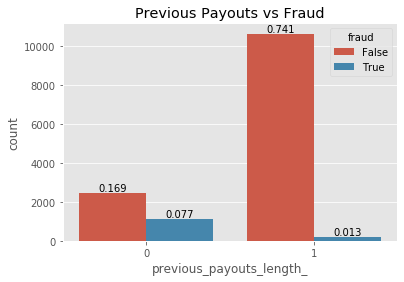

In [161]:
ax = sns.countplot(x='previous_payouts_length_', hue='fraud', data=df)
ax.set_title('Previous Payouts vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['previous_payouts_length_'])
fig.savefig('images/previous_payouts_eda.png')

In [119]:
df[(df['previous_payouts_length_']==1) &(df['fraud']==1)]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail,previous_payouts_length,previous_payouts_length_
130,fraudster,1331535300,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1331041029,...,,None,NaN,NaN,None,None,True,1,29,1
140,fraudster,1333519200,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1332979005,...,,None,NaN,NaN,None,None,True,1,29,1
149,fraudster_event,1335796200,1946,5,GB,GBP,0.0,"<h1><span style=""font-size: x-large;"">You've d...",zumba-perth.com,1335366629,...,St Catherine's Retail Park,GB,56.399777,-3.438740,,,True,0,32,1
248,fraudster_event,1353888000,1458,8,GB,GBP,0.0,<p>The Master Mind Alliance Success Clubs Inte...,yahoo.co.uk,1349979870,...,1 Weir Road,GB,51.430867,-0.190407,Vantage House,London,True,0,11,1
603,fraudster,1325667300,0,6,US,USD,0.0,,gmail.com,1325209535,...,,None,NaN,NaN,None,None,True,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13522,fraudster,1303365600,4076,0,GB,GBP,1.0,"<ul>\r\n<li><font face=""georgia,palatino"" size...",ultimatewine.co.uk,1296472434,...,,GB,51.500152,-0.126236,The Ultimate Wine Experience,London,True,0,22,1
13537,fraudster,1303714800,2000,8,US,USD,0.0,"<p><font size=""3"">This Is One Of My<strong> La...",gmail.com,1301420600,...,4848 Constitution Avenue,US,30.422093,-91.134428,,,True,1,14,1
13625,fraudster,1331106900,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1330616795,...,,None,NaN,NaN,None,None,True,1,29,1
14029,fraudster,1301900400,1805,8,US,USD,0.0,"<p><font size=""3"">This Is One Of My<strong> La...",gmail.com,1300895414,...,10307 N. Mall Dr.,US,30.379213,-91.065613,Courtyard Baton Rouge Siegen Lane,LA,True,1,14,1


In [121]:
df[['previous_payouts', 'fraud']]

,previous_payouts,fraud
0,[],True
1,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False
2,"[{'name': 'Danielle Severn', 'created': '2010-...",False
3,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False
4,[{'name': 'Arts and Business Council or Greate...,False
...,...,...
14332,[],True
14333,"[{'name': 'ARCS Foundation Inc., San Diego Cha...",False
14334,"[{'name': '', 'created': '2013-05-16 03:26:11'...",False
14335,"[{'name': '', 'created': '2010-11-30 01:11:30'...",False


## FB Published DOMAIN ##

In [134]:
df[df['fraud']==1][['fb_published', 'fraud']]

,fb_published,fraud
0,0,True
26,0,True
51,1,True
54,0,True
70,1,True
...,...,...
14316,0,True
14318,0,True
14325,0,True
14332,0,True


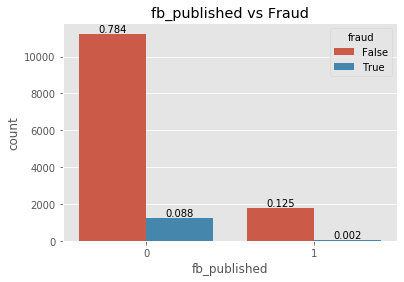

In [159]:
ax = sns.countplot(x='fb_published', hue='fraud', data=df)
ax.set_title('fb_published vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['fb_published'])
fig.savefig('images/fb_published.png')

In [141]:
# fb_published = 0
df[(df['fb_published']==0) &(df['fraud']==True)].shape[0] / df[(df['fb_published']==0) &(df['fraud']==False)].shape[0]

0.11239551840654455

In [142]:
# fb_published = 1
df[(df['fb_published']==1) &(df['fraud']==True)].shape[0] / df[(df['fb_published']==1) &(df['fraud']==False)].shape[0]



0.016129032258064516

## TICKET TYPES ##

In [166]:
df[df['fraud']==1][['ticket_types', 'fraud']]

,ticket_types,fraud
0,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",True
26,"[{'event_id': 1386643, 'cost': 300.0, 'availab...",True
51,"[{'event_id': 1928009, 'cost': 30.0, 'availabi...",True
54,"[{'event_id': 1964043, 'cost': 500.0, 'availab...",True
70,"[{'event_id': 2228484, 'cost': 30.0, 'availabi...",True
...,...,...
14316,"[{'event_id': 5301408, 'cost': 120.0, 'availab...",True
14318,"[{'event_id': 5307036, 'cost': 55.0, 'availabi...",True
14325,"[{'event_id': 5350990, 'cost': 649.65, 'availa...",True
14332,"[{'event_id': 5456442, 'cost': 45.0, 'availabi...",True


In [148]:
df1.head()

,sale_duration,channels,delivery_method,user_type,fb_published,num_order,num_previous_payouts,total_cost,fraud
0,29.0,5,0.0,1,0,0,0,625.00,True
1,28.0,0,1.0,3,0,23,49,70.00,False
2,54.0,8,1.0,3,0,19,36,93.51,False
3,0.0,6,1.0,3,0,39,21,82.00,False
4,63.0,11,0.0,3,1,30,49,814.00,False


In [169]:
df['ticket_types'][0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [173]:
df[(df['ticket_types'].apply(lambda x: len(x))) < 1]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,gmail,previous_payouts_length,previous_payouts_length_
289,fraudster_event,1359676800,0,0,MY,USD,0.0,,aol.com,1355785018,1359244800,NaN,1359234000,0,0.0,0,NaN,0,y,,0,0,0,5046800,,0.0,Rob,0.0,,,[],NaN,40,1,[],9,1354962353,1,,None,NaN,NaN,None,None,True,0,0,0
457,fraudster_event,1377061200,0,0,MA,USD,0.0,,hotmail.fr,1373135272,1376629200,NaN,1376618400,0,0.0,0,NaN,0,y,,0,0,0,7342241,"<p>I am a student of game development, I am pu...",0.0,Anshul Soni,0.0,,,[],NaN,40,1,[],2,1372969091,3,,None,NaN,NaN,None,None,True,0,0,0
749,fraudster_event,1352806200,911,5,CA,USD,0.0,"<p style=""text-align: justify;""><strong>twice ...",yahoo.com,1352091465,1352374200,NaN,1352354400,0,0.0,0,NaN,0,y,TWICE AS NICE(The Virgo Reunion Bash),37,0,0,4751583,<p><strong>Twice as nice </strong>is an event ...,0.0,Afro Entertainment,0.0,,,[],NaN,3,1,[],0,1352091463,1,1129 Valley Rd,US,40.864951,-74.19282,Macaluso's,NJ,True,0,0,0
835,premium,1366930800,0,0,US,USD,0.0,,aol.com,1363014311,1366498800,NaN,1366488000,0,0.0,0,NaN,1,y,,0,0,0,5682662,"<p> </p>\r\n<p class=""MsoNormal"" style=""margin...",0.0,Head and Heart Philanthropy & National Basketb...,0.0,,,[],NaN,40,1,[],872,1287682056,3,,None,NaN,NaN,None,None,False,0,0,0
852,fraudster_event,1367794800,0,0,GB,GBP,0.0,,yahoo.com,1363828752,1367362800,NaN,1367352000,0,0.0,0,NaN,1,y,,0,0,0,5925851,,NaN,,NaN,,,[],NaN,41,1,[],0,1363828083,1,,None,NaN,NaN,None,None,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,fraudster_event,1358553600,0,0,PR,USD,0.0,,gmail.com,1354631023,1358121600,NaN,1358110800,0,0.0,0,NaN,0,y,,0,0,0,4846497,,0.0,M.V.B. Inc.,0.0,,,[],NaN,40,1,[],18,1353093014,1,,None,NaN,NaN,None,None,True,1,0,0
13810,fraudster_event,1362956400,0,0,GB,GBP,0.0,,hotmail.co.uk,1359038882,1362528000,NaN,1362517200,0,0.0,0,NaN,1,y,,0,0,0,5313542,,0.0,THE FUNCTIONS ORG,0.0,,,[],NaN,40,1,[],1,1358948648,1,,None,NaN,NaN,None,None,True,0,0,0
13944,fraudster_event,1376110800,0,0,MA,USD,0.0,,live.fr,1372153496,1375678800,NaN,1375668000,0,0.0,0,NaN,0,y,,0,0,0,7200941,,0.0,,0.0,,,[],NaN,40,1,[],22,1370275684,4,,None,NaN,NaN,None,None,True,0,0,0
14203,fraudster_event,1346713200,0,0,ES,GBP,0.0,,yahoo.com,1342791861,1346281200,0.0,1346270400,0,0.0,0,0.0,1,y,,0,0,0,3948574,,NaN,,NaN,,,[],NaN,40,1,[],0,1342791859,3,,None,NaN,NaN,None,None,True,0,0,0


In [199]:
# Ticket Type Length is 'True' if the length of ticket type is 0
df['ticket_type_length'] = (df['ticket_types'].apply(lambda x: len(x)) < 1)

In [187]:
df[(df['ticket_type_length'] == True) & (df['fraud'] == True)][['fraud','ticket_type_length']]




,fraud,ticket_type_length
289,True,True
457,True,True
749,True,True
852,True,True
930,True,True
...,...,...
13767,True,True
13810,True,True
13944,True,True
14203,True,True


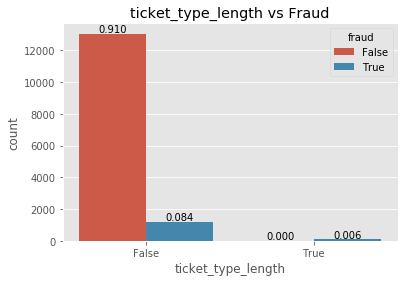

In [200]:
ax = sns.countplot(x='ticket_type_length', hue='fraud', data=df)
ax.set_title('ticket_type_length vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['fb_published'])
fig.savefig('images/ticket_type_length.png')

##### Ticket type multiplication

In [190]:
df['ticket_types'][0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [211]:
gross_profits_list = []
for row in df['ticket_types']:
    gross_profits = 0
    for i in range(len(row)):
        gross_profits += row[i]['cost'] * row[i]['quantity_sold']
    gross_profits_list.append(gross_profits)
df['gross_profits'] = gross_profits_list

In [213]:
df[(df['gross_profits'] < 1) & (df['fraud'] == True)][['gross_profits', 'fraud']]

,gross_profits,fraud
0,0.0,True
54,0.0,True
70,0.0,True
149,0.0,True
177,0.0,True
...,...,...
14316,0.0,True
14318,0.0,True
14325,0.0,True
14332,0.0,True


In [241]:
def gross_profit_dummie(x):
    '''
    Seperates the gross values by their percentiles. 
    0 being no gross profits made,
    1 being less than $75 made
    2 being less than $345 made
    3 being less than $1356 made
    4 being more than $1356 made
    '''
    if x < 1:
        return 0
    elif x < 75:
        return 1
    elif x < 345:
        return 2
    elif x < 1356:
        return 3
    else:
        return 4

In [238]:
# 0 if the profit is zero (as in no tickets sold and no profit made) and 1 otherwise
#df['gross_profits_dummie'] = df['gross_profits'].apply(lambda x: 0 if x < 1 else 1)

In [239]:
df['gross_profits_dummie'] = df['gross_profits'].apply(lambda x: gross_profit_dummie(x))

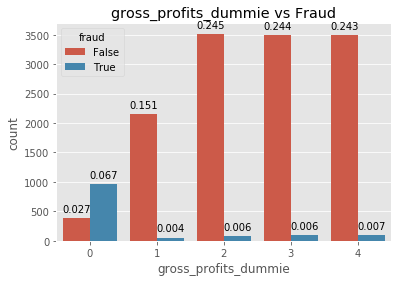

In [242]:
ax = sns.countplot(x='gross_profits_dummie', hue='fraud', data=df)
ax.set_title('gross_profits_dummie vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['gross_profits_dummie'])
fig.savefig('images/gross_profits_dummie.png')

In [225]:
df['gross_profits'].describe()

count     14337.000000
mean       2611.657684
std       12919.591558
min           0.000000
25%          75.000000
50%         345.000000
75%        1356.120000
max      814477.960000
Name: gross_profits, dtype: float64

## Channels ##

In [243]:
df[df['fraud']==1][['channels', 'fraud']]

,channels,fraud
0,5,True
26,11,True
51,6,True
54,11,True
70,13,True
...,...,...
14316,4,True
14318,0,True
14325,0,True
14332,0,True


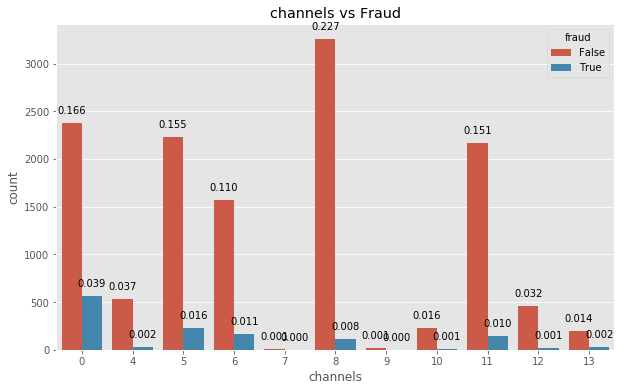

In [249]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='channels', hue='fraud', data=df)
ax.set_title('channels vs Fraud')
fig = ax.get_figure()
bar_percent(ax, df['channels'])
fig.savefig('images/channels_eda.png')